In [1]:
!python3 --version

Python 3.8.11


In [2]:
import pandas

from utils import calculate_percent_replicating_Target, plot_simple_comparison

In [3]:
variable = 'Days between staining and imaging'
variable_to_save = variable.replace(' ','_')

plate_df = pandas.DataFrame()

timepoint_dict = {0:'2020_11_04_CPJUMP1',1: '2020_11_18_CPJUMP1_TimepointDay1', 
4:'2020_11_19_TimepointDay4', 14:'2020_12_02_CPJUMP1_2WeeksTimePoint', 28:'2020_12_07_CPJUMP1_4WeeksTimePoint'}

for eachtimepoint in timepoint_dict.keys():
    if eachtimepoint in [1,4]:
        n_replicates = 2 #only half of the plate was imaged on these days
    else:
        n_replicates = 4
    plate_df = plate_df.append({'Plate Name List' : ['BR00117020','BR00117021'], 
    variable : eachtimepoint, 'Batch' : 'ConditionA', 'Percent Replicating' : calculate_percent_replicating_Target(
        f'../profiles-cp-jump1/profiles/{timepoint_dict[eachtimepoint]}',['BR00117020','BR00117021'],
        n_replicates=n_replicates),'Cell Type':'A549'}, ignore_index=True)
    
    plate_df = plate_df.append({'Plate Name List' : ['BR00118050','BR00117006'], 
    variable : eachtimepoint, 'Batch' : 'ConditionB', 'Percent Replicating' : calculate_percent_replicating_Target(
        f'../profiles-cp-jump1/profiles/{timepoint_dict[eachtimepoint]}',['BR00118050','BR00117006'],
        n_replicates=n_replicates),'Cell Type':'A549'}, ignore_index=True)

    plate_df = plate_df.append({'Plate Name List' : ['BR00117022','BR00117023'], 
    variable : eachtimepoint, 'Batch' : 'ConditionA', 'Percent Replicating' : calculate_percent_replicating_Target(
        f'../profiles-cp-jump1/profiles/{timepoint_dict[eachtimepoint]}',['BR00117022','BR00117023'],
        n_replicates=n_replicates),'Cell Type':'U2OS'}, ignore_index=True)
    
    plate_df = plate_df.append({'Plate Name List' : ['BR00118039','BR00118040'], 
    variable : eachtimepoint, 'Batch' : 'ConditionB', 'Percent Replicating' : calculate_percent_replicating_Target(
        f'../profiles-cp-jump1/profiles/{timepoint_dict[eachtimepoint]}',['BR00118039','BR00118040'],
        n_replicates=n_replicates),'Cell Type':'U2OS'}, ignore_index=True)

Saved to ../figures/Days between staining and imaging-Percent Replicating-Batch-Cell Type-None.png


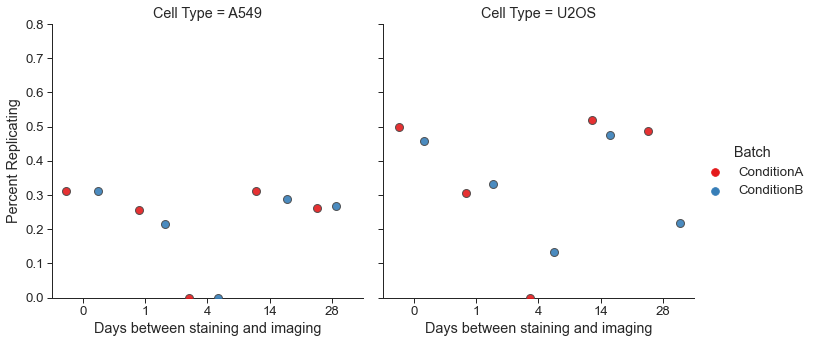

In [4]:
#You may find that running this a couple of times is needed to find a version where the jitter is about right
plot_simple_comparison(df=plate_df,x=variable,hue='Batch',col='Cell Type',title=' ')

In [5]:
plate_df.to_csv(f'checkpoint_csvs/{variable_to_save}-replicating.csv',index=False)